In [4]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.cluster.vq import whiten, kmeans2

In [5]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [5]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')


In [7]:
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    losses = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            losses += 1 if f['result']['goalsHomeTeam'] < f['result']['goalsAwayTeam'] else 0
        else:
            losses += 1 if f['result']['goalsAwayTeam'] < f['result']['goalsHomeTeam'] else 0
    team['losses'] = losses

In [9]:
team_for_pd = []
for team in teams:
    if team['losses']:
        team_for_pd.append({'name': team['name'], 'len_name_team': len(team['name']), 'losses': team['losses']})


In [10]:
teams_pd = pd.DataFrame(team_for_pd)

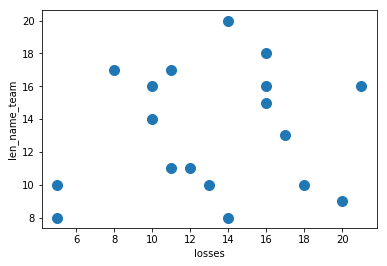

In [23]:
teams_pd.plot.scatter(x='len_name_team', y='losses', s=100)

In [13]:
del teams_pd['name']

In [14]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 2.75234506,  2.89684728],
       [ 2.20187605,  1.11417203],
       [ 3.57804858,  3.7881849 ],
       [ 5.50469012,  3.11968168],
       [ 3.02757956,  2.45117846],
       [ 4.40375209,  2.22834406],
       [ 2.75234506,  4.0110193 ],
       [ 2.75234506,  1.11417203],
       [ 4.6789866 ,  2.45117846],
       [ 2.47711055,  4.45668812],
       [ 4.12851759,  3.56535049],
       [ 4.9542211 ,  3.56535049],
       [ 4.6789866 ,  1.78267525],
       [ 3.85328308,  2.22834406],
       [ 4.40375209,  3.56535049],
       [ 2.20187605,  3.11968168],
       [ 4.40375209,  4.67952252],
       [ 3.02757956,  2.67401287]])

In [31]:
centroids, cluster_map = kmeans2(whitened, 3)

In [32]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

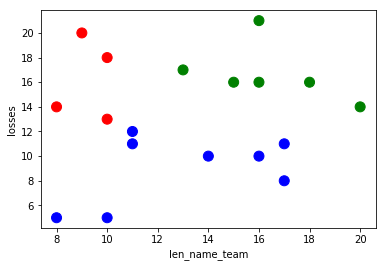

In [33]:
teams_pd.plot.scatter(x='len_name_team', y='losses', c=colors, s=100)

In [36]:
centroids, cluster_map = kmeans2(whitened, 5)

In [37]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

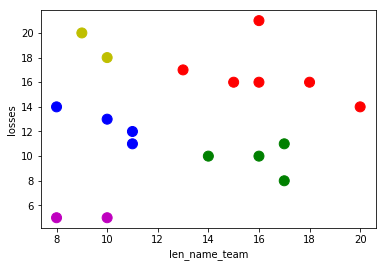

In [38]:
teams_pd.plot.scatter(x='len_name_team', y='losses', c=colors, s=100)